<a href="https://colab.research.google.com/github/Farah-Deeba-UNCC/Introduction-to-ML/blob/main/Notebooks/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

100%|██████████| 170498071/170498071 [00:05<00:00, 33846000.63it/s]


Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/


In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [6]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(
                3072,  # <1>
                512,   # <2>
            ),
            nn.Tanh(),
            nn.Linear(
                512,   # <2>
                n_out, # <3>
            )
        )

In [7]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [8]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [9]:
softmax(x).sum()

tensor(1.)

In [10]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [11]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

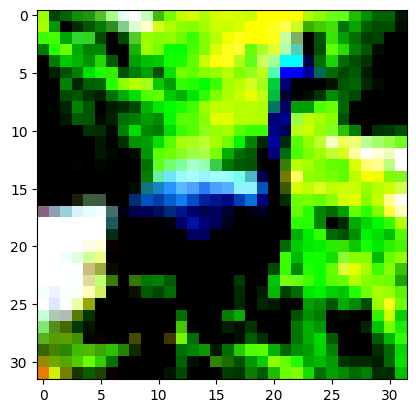

In [12]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [13]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

In [14]:
out = model(img_batch)
out

tensor([[0.4670, 0.5330]], grad_fn=<SoftmaxBackward0>)

In [15]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [16]:
loss = nn.NLLLoss()

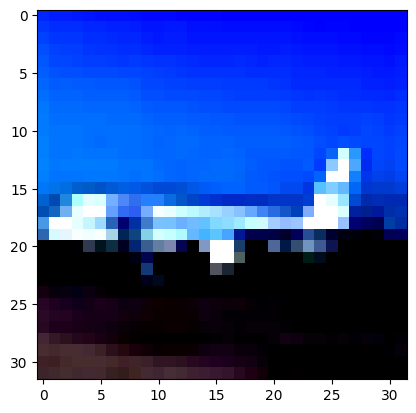

tensor(0.6655, grad_fn=<NllLossBackward0>)

In [17]:
img, label = cifar2[1000]

out = model(img.view(-1).unsqueeze(0))
plt.imshow(img.permute(1, 2, 0))
plt.show()
loss(out, torch.tensor([label]))

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 5.404442
Epoch: 1, Loss: 4.594254
Epoch: 2, Loss: 7.518032


KeyboardInterrupt: 

In [19]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.540252
Epoch: 1, Loss: 0.391975
Epoch: 2, Loss: 0.369786
Epoch: 3, Loss: 0.592596
Epoch: 4, Loss: 0.222844
Epoch: 5, Loss: 0.349129
Epoch: 6, Loss: 0.452341
Epoch: 7, Loss: 0.420814
Epoch: 8, Loss: 0.330088
Epoch: 9, Loss: 0.405208
Epoch: 10, Loss: 0.345395
Epoch: 11, Loss: 0.351406
Epoch: 12, Loss: 0.335436
Epoch: 13, Loss: 0.216849
Epoch: 14, Loss: 0.743404
Epoch: 15, Loss: 0.384762
Epoch: 16, Loss: 0.173192
Epoch: 17, Loss: 0.192317
Epoch: 18, Loss: 0.412830
Epoch: 19, Loss: 0.298938
Epoch: 20, Loss: 0.239773
Epoch: 21, Loss: 0.630133
Epoch: 22, Loss: 0.251880
Epoch: 23, Loss: 0.390435
Epoch: 24, Loss: 0.221121
Epoch: 25, Loss: 0.298493
Epoch: 26, Loss: 0.146212
Epoch: 27, Loss: 0.361209
Epoch: 28, Loss: 0.331918
Epoch: 29, Loss: 0.261619
Epoch: 30, Loss: 0.220884
Epoch: 31, Loss: 0.418197
Epoch: 32, Loss: 0.172819
Epoch: 33, Loss: 0.129504
Epoch: 34, Loss: 0.113359
Epoch: 35, Loss: 0.093747
Epoch: 36, Loss: 0.090278
Epoch: 37, Loss: 0.043364
Epoch: 38, Loss: 0.175

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

In [36]:
numel_list = [p.numel() for p in model.parameters()]
numel_list, model, sum(numel_list)

([393216, 128, 256, 2],
 Sequential(
   (0): Linear(in_features=3072, out_features=128, bias=True)
   (1): Tanh()
   (2): Linear(in_features=128, out_features=2, bias=True)
   (3): LogSoftmax(dim=1)
 ),
 393602)